In [169]:
import random
import copy
import math
import matplotlib.pyplot as plt



In [170]:
#Initialization
POPULATION_SIZE = 20
CITIES_SIZE = 20
TOUR_SIZE = 21
NUM_EXECUTION = 10000
population = []
x = [1,1,2,2,2,4,4,5,6,6,6,7,8,8,9,10,10,10,11,11]
y = [1,3,2,4,6,1,2,4,1,3,6,2,3,5,2,2,3,4,2,3]

In [171]:
tour = [[0 for x in range(TOUR_SIZE)] for y in range(TOUR_SIZE)]
dCidade = [[0 for x in range(POPULATION_SIZE)] for y in range(POPULATION_SIZE)]
distances = [0 for x in range(POPULATION_SIZE)]
parentOne = None
parentTwo = None
costByExecution = []

In [172]:
def generateFirstPopulation():
    for _ in range(1,POPULATION_SIZE + 1 ):
        generatePossiblePath()

In [173]:
def generatePossiblePath():
    path = [1]
    for _ in range(1,CITIES_SIZE - 1):
        randomNum = random.randint(2,19)
        while(numberExistsInPath(path,randomNum)):
            randomNum = random.randint(2,19)
        path.append(randomNum)
    
    path.append(20)
    population.append(path)
    #print(population)

In [174]:
def numberExistsInPath(path,number):
    for i in path:
        if i == number:
            return True
    return False

In [175]:
def generateTour():
    global tour
    tour = copy.deepcopy(population)
    for ways in tour:
        first = ways[0]
        ways.append(first)

In [176]:
def calculateDistances():
    global distances 
    distances = [0 for x in range(CITIES_SIZE)]

    #print(tour)

    for i in range(len(population)):
        for j in range(len(population[i])):

            #print(j)

            firstPos = 19 if tour[i][j] == 20 else tour[i][j]
            secondPos = 19 if tour[i][j+1] == 20 else tour[i][j+1]
            distances[i] += round(dCidade[firstPos][secondPos],4)
    dict_dist = {i : distances[i] for i in range(0,len(distances))}
    distances = copy.deepcopy(dict_dist)
    return sorted(distances.items(),key =lambda kv: kv[1])
    

In [177]:
def fitnessFunction():
    
    for i in range(len(population)):
        for j in range(len(population)):
            dCidade[i][j] = round(math.sqrt(((x[i] - x[j])** 2) + ((y[i] - y[j])**2)),4)
    return calculateDistances()

In [178]:
def rouletteFunction(sorted_x):
    global parentsOne
    global parentsTwo
    arr = []
    rouletteArr = []
    for i in range(10):
        arr.append(sorted_x[i][0])
    
    for j in range(len(arr)):
        for _ in range(10 - j):
            rouletteArr.append(arr[j])
    
    parentsOne = createParents(rouletteArr)
    parentsTwo = createParents(rouletteArr)
    


In [179]:
def createParents(rouletteArr):
    parentArr = []
    for _ in range(5):
        parentArr.append(rouletteArr[random.randint(0,54)])
    return parentArr

In [180]:
def mutate(matrix):
    for i in range(0,len(matrix)):
        for _ in range(0,len(matrix[i])):
            ranNum = random.randint(1,100)
            if ranNum >= 1 and ranNum <= 5:
                indexOne = random.randint(0 , 19)
                indexTwo = random.randint(0,19)
                auxOne = matrix[i][indexOne]
                auxTwo = matrix[i][indexTwo]
                matrix[i][indexOne] = auxTwo
                matrix[i][indexTwo] = auxOne

In [181]:
def hasDuplicity(auxArray,usedIndexes):
    for i in range(len(auxArray)):
        for j in range(i,len(auxArray)):
            if i != j and auxArray[i] == auxArray[j]:
                if i in usedIndexes:
                    return j
                else:
                    return i
    return -1

def doCycle(sorted_x):
    global population
    children = []

    for i in range(5):
        parentOneAux = parentsOne[i]
        parentTwoAux = parentsTwo[i]
        usedIndexes = []

        randomIndexInsideCromossomus = random.randint(0 , POPULATION_SIZE  - 1)

        usedIndexes.append(randomIndexInsideCromossomus)

        childOne = copy.deepcopy(population[parentOneAux])
        childTwo = copy.deepcopy(population[parentTwoAux])

        valAuxOne = childOne[randomIndexInsideCromossomus]
        valAuxTwo = childTwo[randomIndexInsideCromossomus]

        while(hasDuplicity(childOne,usedIndexes) != -1):
            newIndex = hasDuplicity(childOne,usedIndexes)
            usedIndexes.append(newIndex)

            valAuxOne = childOne[newIndex]
            valAuxTwo = childTwo[newIndex]

            childOne[newIndex] = valAuxTwo
            childTwo[newIndex] = valAuxOne

        children.append(childOne)
        children.append(childTwo)

    mutate(children)
    
    tempPop  = copy.deepcopy(population)

    for i in range(1,10):
        population[i] = copy.deepcopy(tempPop[sorted_x[i][0]])

    for j in range(10,POPULATION_SIZE):
        population[j] = copy.deepcopy(children[j - 10])




Total Population: 20
Mutation Probability : 5%
Number of cities: 20
Optimal path cost: 31.429600000000004
Best Route: [1, 12, 2, 7, 16, 19, 3, 14, 10, 17, 5, 18, 4, 11, 8, 6, 15, 13, 9, 20]
Best route trajectory : 
1 1
7 2
1 3
4 2
10 2
11 2
2 2
8 5
6 3
10 3
2 6
10 4
2 4
6 6
5 4
4 1
9 2
8 3
6 1
11 3


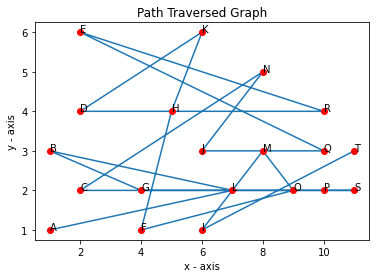

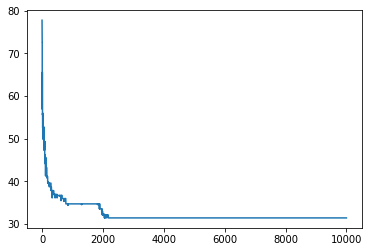

In [182]:
def main():
    generateFirstPopulation()
    # generateXandY()
    generateTour()

    for _ in range(NUM_EXECUTION):
        sorted_x = fitnessFunction()
        rouletteFunction(sorted_x)
        doCycle(sorted_x)
        generateTour()
        costByExecution.append(sorted_x[0][1])
    
    sorted_x = fitnessFunction()

   
    a = []
    b = []
    
    for i in range(20):
        z = population[0][i]
        a.append(x[z - 1])
        b.append(y[z- 1])
    
    print('Total Population: %s' %(POPULATION_SIZE))
    print('Mutation Probability : 5%')
    print('Number of cities: %s' % (CITIES_SIZE))
    print('Optimal path cost: %s' % sorted_x[0][1])
    print('Best Route: %s' % population[0])
    print("Best route trajectory : ")
    for i in range(20):
       
        print(a[i],b[i])
  
 

    plt.plot(a,b)
    plt.plot(a, b,'ro')


# naming the x axis
    plt.xlabel('x - axis')
# naming the y axis
    plt.ylabel('y - axis')

# giving a title to my graph
    plt.title('Path Traversed Graph')
    for i in range(20):
        #plt.annotate((a[i],b[i]),(a[i],b[i]))
        plt.annotate(chr(64 + population[0][i]),(a[i],b[i]))
    plt.show()

    plt.plot(costByExecution)
    plt.show()

if __name__ == "__main__":
    main()